# Técnicas de Pré-processamento para OCR

# Importando as bibliotecas

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

def adjustImageForDisplay(img):
    """Ajusta a imagem para a exibição, adicionando cmap se necessário."""
    
    # Verifica se a imagem está em escala de cinza (um canal)
    # Para imagens em escala de cinza, o cmap 'gray' é necessário para exibir corretamente
    if len(img.shape) == 2:  
        return {'X': img, 'cmap': 'gray'}  # Retorna o dicionário com a imagem e o cmap para escala de cinza
    return {'X': img}  # Para imagens RGB, retorna apenas a imagem

In [3]:
def plot_image(img, title='placeholder'):
    """Exibe a imagem com ajustes apropriados."""
    plt.figure(figsize=(8, 6))  # Define o tamanho da figura
    plt.imshow(**adjustImageForDisplay(img))  # Usa o dicionário retornado por adjustImageForDisplay para passar parâmetros para imshow
    plt.title(title)  # Adiciona o título à imagem
    plt.axis('off')  # Oculta os eixos para melhor visualização da imagem
    plt.show()  # Exibe a imagem


# Escala de cinza (*grayscale*)

In [4]:
img = cv2.imread('./assets/img-process.jpg')

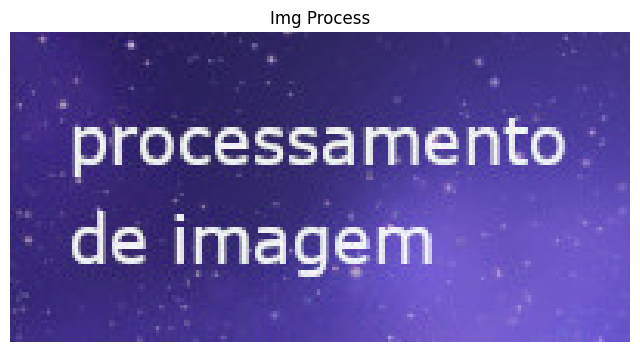

In [5]:
img = cv2.imread('./assets/img-process.jpg')
plot_image(img, 'Img Process')

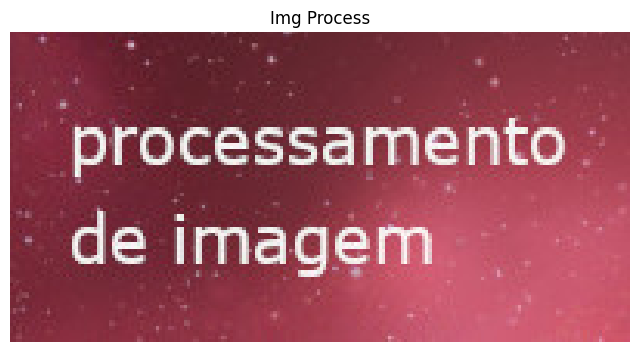

In [6]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_image(rgb, 'Img Process')

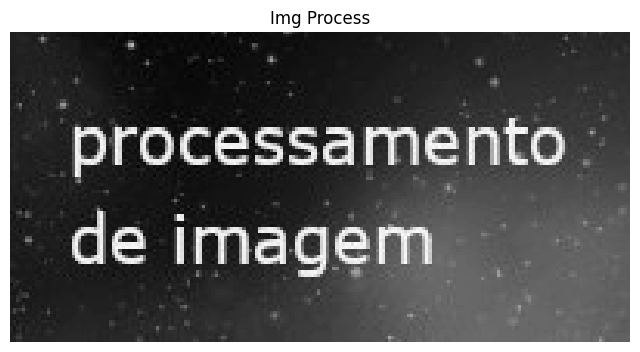

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plot_image(gray, 'Img Process')

# Limiarização  (*thresholding*)

A limiarização, ou thresholding, é uma técnica fundamental em processamento de imagem usada para segmentar uma imagem em diferentes regiões com base na intensidade dos pixels. 

Limiarização (Thresholding) é o processo de converter uma imagem em tons de cinza (ou uma imagem colorida) em uma imagem binária (preto e branco) usando um valor de limiar. Esse valor determina o critério para classificar os pixels em duas categorias: acima ou abaixo do limiar.

**Escolha do Valor de Limiar:** Um valor de limiar (ou threshold) é definido. Todos os pixels com valores acima desse limiar são definidos como um valor (geralmente branco), e todos os pixels abaixo do limiar são definidos como outro valor (geralmente preto).

**Aplicação do Limiar:** Para cada pixel na imagem:

- Se o valor do pixel for maior que o limiar, ele é definido como o valor de fundo (por exemplo, branco).
- Se o valor do pixel for menor ou igual ao limiar, ele é definido como o valor do primeiro plano (por exemplo, preto).

**Tipos de Limiarização:**

- **Limiarização Global:** Um único valor de limiar é usado para toda a imagem. Simples e rápido, mas pode não funcionar bem para imagens com iluminação variável ou com diferentes regiões de interesse.

- **Limiarização Adaptativa (Gaussiana):** O valor do limiar é calculado localmente para diferentes regiões da imagem. Útil para imagens com iluminação desigual ou quando a imagem tem regiões com diferentes condições de iluminação.

- **Limiarização Otsu:** Um método automático que calcula o valor do limiar que minimiza a variância intra-classe. Ideal para imagens com histogramas bimodais.

## Limiarização Simples (*Threshold*)

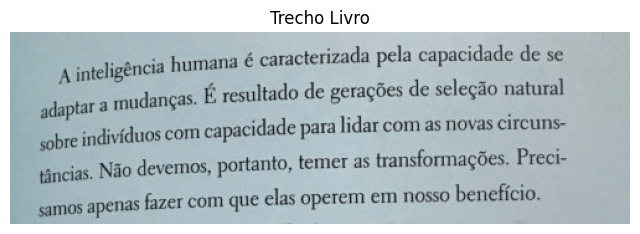

In [8]:
img = cv2.imread('./assets/trecho-livro.jpg')
plot_image(img, 'Trecho Livro')

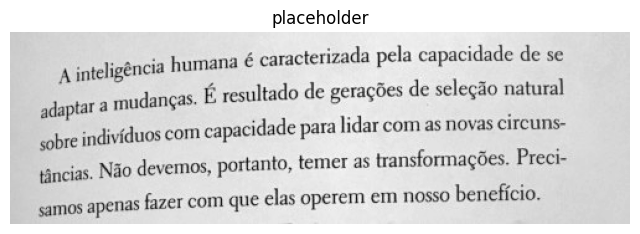

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plot_image(gray)

A função `cv2.threshold` aplica um limiar a uma imagem em escala de cinza para criar uma imagem binária. (https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)

In [10]:
# Define o valor do limiar para a operação de thresholding.
limiar_val = 127  

# Define o valor máximo atribuído aos pixels que excedem o limiar. 
max_pixel_value = 255  # Neste caso, representa a cor branca na imagem binária.

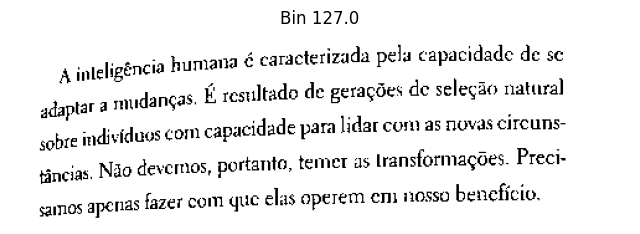

In [11]:
val, thresh = cv2.threshold(src=gray, thresh=limiar_val, maxval=max_pixel_value, type=cv2.THRESH_BINARY)
plot_image(thresh, f'Bin {val}')

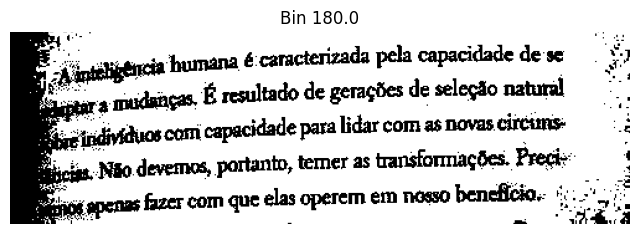

In [12]:
val, thresh = cv2.threshold(src=gray, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
plot_image(thresh, f'Bin {val}')

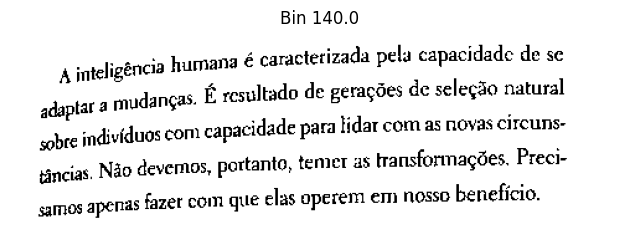

In [13]:
val, thresh = cv2.threshold(src=gray, thresh=140, maxval=255, type=cv2.THRESH_BINARY)
plot_image(thresh, f'Bin {val}')

## Limiarização Método de Otsu

Um método automático que calcula o valor do limiar que minimiza a variância intra-classe. Ideal para imagens com histogramas bimodais.

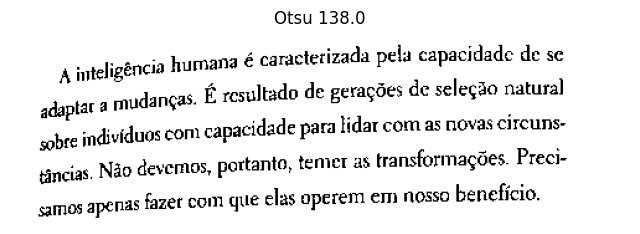

In [14]:
val, otsu = cv2.threshold(src=gray, thresh=140, maxval=255, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plot_image(otsu, f'Otsu {val}')

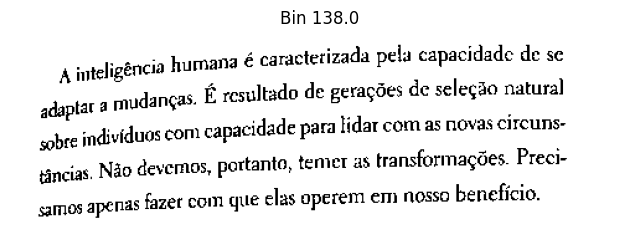

In [15]:
img = cv2.imread('./assets/receita01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, thresh = cv2.threshold(src=gray, thresh=138, maxval=255, type=cv2.THRESH_BINARY)

plot_image(otsu, f'Bin {val}')

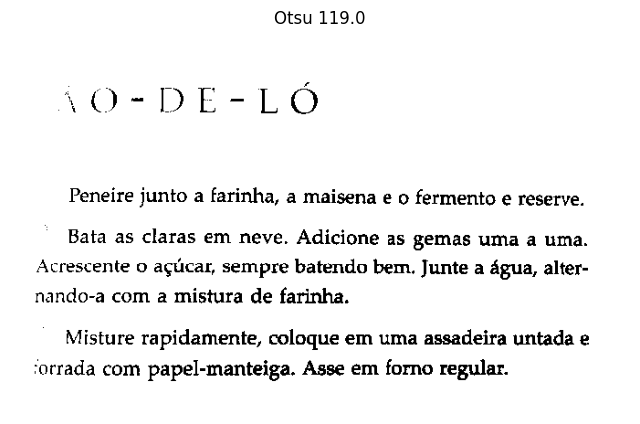

In [16]:
val, otsu = cv2.threshold(src=gray, thresh=138, maxval=255, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plot_image(otsu, f'Otsu {val}')

## Limiarização Adaptativa

O valor do limiar é calculado localmente para diferentes regiões da imagem. Útil para imagens com iluminação desigual ou quando a imagem tem regiões com diferentes condições de iluminação.

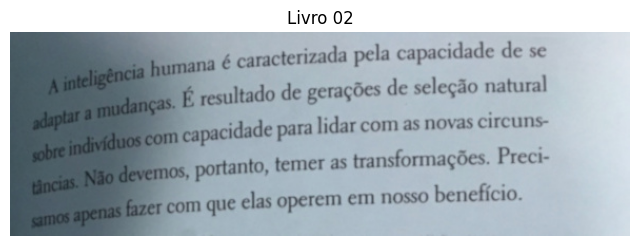

In [17]:
img = cv2.imread('./assets/livro02.jpg')
plot_image(img, 'Livro 02')

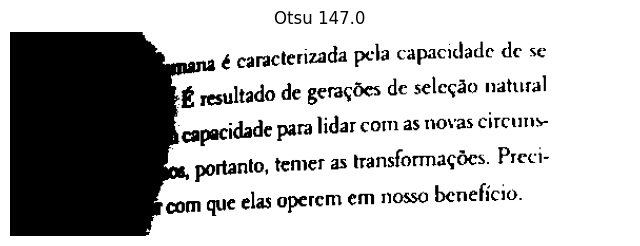

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, otsu = cv2.threshold(src=gray, thresh=0, maxval=255, type=cv2.THRESH_BINARY| cv2.THRESH_OTSU)
plot_image(otsu, f'Otsu {val}')

In [19]:
# Define o tamanho do bloco de pixels ao redor de cada pixel usado para calcular o valor do limiar local.
# Deve ser um número ímpar maior que 1.
tamanho_bloco = 11  

# Define a constante subtraída da média calculada (ou ponderada, dependendo do método). 
# Ajusta o limiar localmente, tornando a segmentação mais precisa em imagens com iluminação variável.
constante_C = 9  

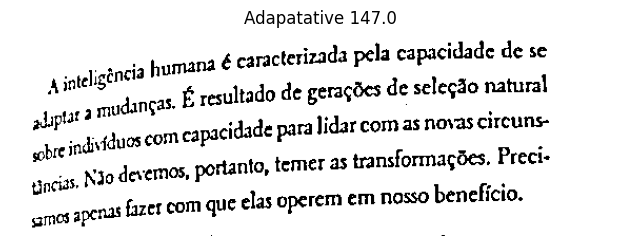

In [20]:
adapt_media = cv2.adaptiveThreshold(src=gray, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=tamanho_bloco, C=constante_C)
plot_image(adapt_media, f'Adapatative')

## Limiarização Adaptativa Gaussiana

In [21]:
# Define o tamanho do bloco de pixels ao redor de cada pixel usado para calcular o valor do limiar local.
# Deve ser um número ímpar maior que 1.
tamanho_bloco = 11  

# Define a constante subtraída da média calculada (ou ponderada, dependendo do método). 
# Ajusta o limiar localmente, tornando a segmentação mais precisa em imagens com iluminação variável.
constante_C = 9 

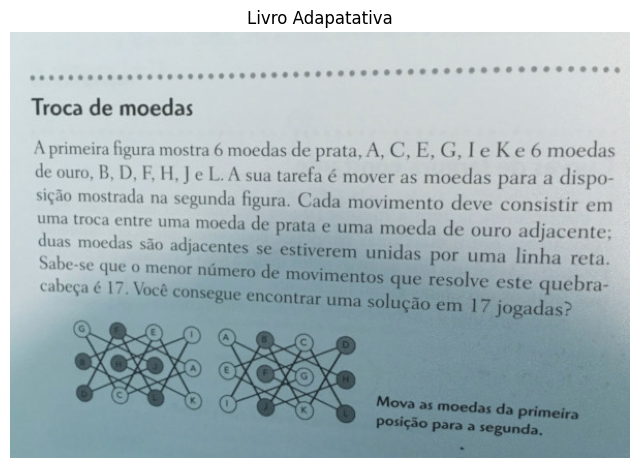

In [22]:
img = cv2.imread('./assets/livro_adaptativa.jpg')
plot_image(img, 'Livro Adapatativa')

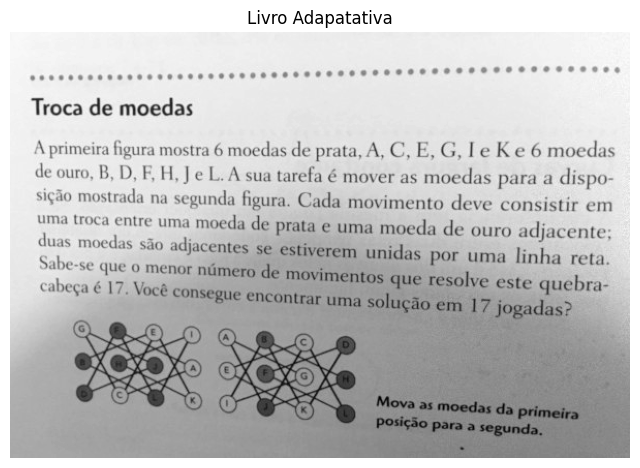

In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plot_image(gray, 'Livro Adapatativa')

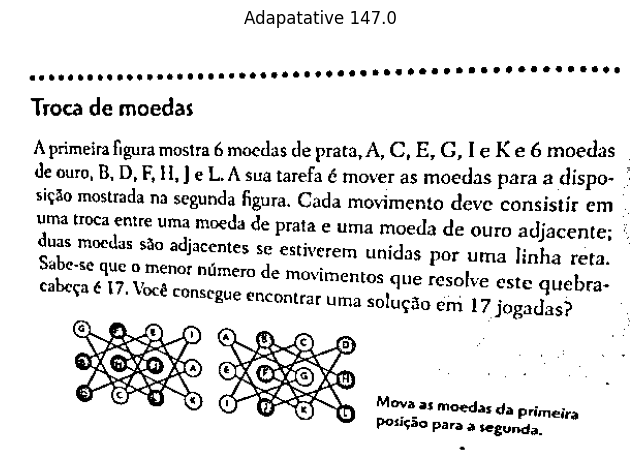

In [24]:
adapt_media = cv2.adaptiveThreshold(src=gray, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=tamanho_bloco, C=constante_C)
plot_image(adapt_media, f'Adapatative')

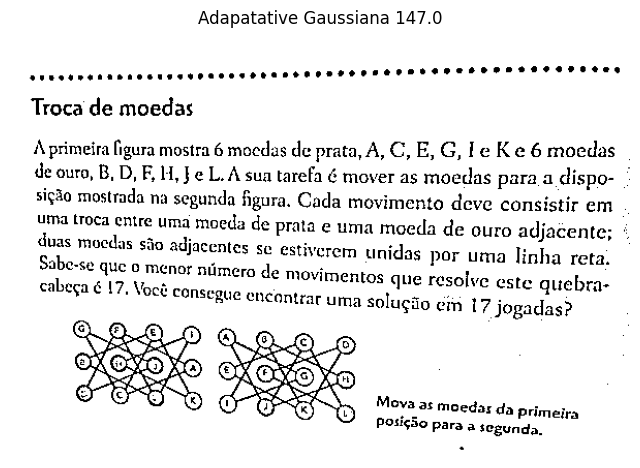

In [25]:
adapt_media_gauss = cv2.adaptiveThreshold(src=gray, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=tamanho_bloco, C=constante_C)
plot_image(adapt_media_gauss, f'Adapatative Gaussiana')

# Inversão

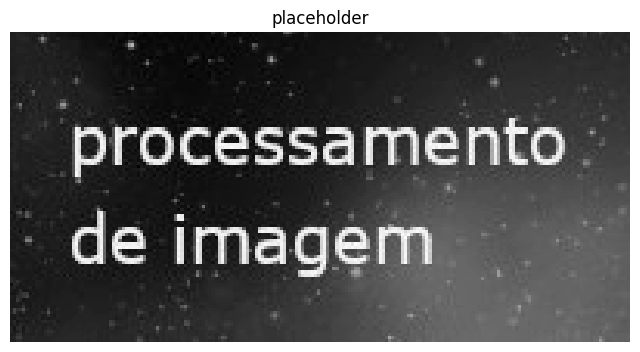

In [26]:
img = cv2.imread('./assets/img-process.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plot_image(gray)

In [27]:
gray

array([[ 68,  70,  72, ...,  76,  74,  74],
       [ 68,  70,  73, ...,  75,  74,  77],
       [ 70,  70,  72, ...,  74,  73,  76],
       ...,
       [ 67,  69,  82, ..., 123, 123, 124],
       [ 70,  76,  92, ..., 124, 124, 125],
       [ 70,  70,  80, ..., 123, 122, 123]], dtype=uint8)

In [28]:
invert = 255 - gray

In [29]:
invert

array([[187, 185, 183, ..., 179, 181, 181],
       [187, 185, 182, ..., 180, 181, 178],
       [185, 185, 183, ..., 181, 182, 179],
       ...,
       [188, 186, 173, ..., 132, 132, 131],
       [185, 179, 163, ..., 131, 131, 130],
       [185, 185, 175, ..., 132, 133, 132]], dtype=uint8)

In [ ]:
plot_image(invert)

In [ ]:
cv2_imshow(thresh)

In [ ]:
invert = 255 - thresh
cv2_imshow(invert)

# Redimensionamento

- INTER_NEAREST - uma interpolação de vizinho mais próximo. É muito usado por ser o mais rápido.
- INTER_LINEAR - uma interpolação bilinear (é usada por padrão), boa no geral para aumentar e também pra diminuir imagens.
- INTER_AREA - usa a relação de área de pixel. Pode ser um método preferido para a redução de imagens pois fornece resultados sem moiré (efeito geralmente indesejado na imagem). Mas quando a imagem é ampliada, é semelhante ao método INTER_NEAREST.
- INTER_CUBIC - bicúbica (4x4 pixel vizinhos). Possui resultados melhores.
- INTER_LANCZOS4 - interpolação Lanczos (8x8 pixel vizinhos). Dentre esses algoritmos, é o que apresenta resultados com a melhor qualidade.

In [ ]:
cv2_imshow(gray)

In [ ]:
maior = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
cv2_imshow(maior)

In [ ]:
menor = cv2.resize(gray, None, fx = 0.5, fy = 0.5, interpolation=cv2.INTER_AREA)
cv2_imshow(menor)

# Operações Morfológicas

In [ ]:
img = cv2.imread('/content/texto-opencv.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

## Erosão

In [ ]:
np.ones((3, 3), np.uint8)

In [ ]:
erosao = cv2.erode(gray, np.ones((3, 3), np.uint8))
cv2_imshow(erosao)

## Dilatação

In [ ]:
dilatacao = cv2.dilate(gray, np.ones((3,3), np.uint8))
cv2_imshow(dilatacao)

## Abertura

In [ ]:
erosao = cv2.erode(gray, np.ones((5, 5), np.uint8))
abertura = cv2.dilate(erosao, np.ones((5,5), np.uint8))
cv2_imshow(gray)
cv2_imshow(erosao)
cv2_imshow(abertura)

## Fechamento

In [ ]:
img = cv2.imread('texto-opencv2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
dilatacao = cv2.dilate(gray, np.ones((5,5)))
fechamento = cv2.erode(dilatacao, np.ones((5,5)))
cv2_imshow(gray)
cv2_imshow(dilatacao)
cv2_imshow(fechamento)

# Remoção de Ruído

## Desfoque com Média

In [ ]:
img = cv2.imread('teste_ruido.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
desfoque_media = cv2.blur(gray, (5,5))
cv2_imshow(desfoque_media)

## Desfoque Gaussiano


In [ ]:
desfoque_gaussiano = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(desfoque_gaussiano)

## Desfoque com Mediana

In [ ]:
desfoque_mediana = cv2.medianBlur(gray, 3)
cv2_imshow(desfoque_mediana)

## Filtro bilateral

In [ ]:
desfoque_bilateral = cv2.bilateralFilter(gray, 15, 55, 45)
cv2_imshow(desfoque_bilateral)

# Detecção de textos

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import pytesseract

*Aviso: em setembro de 2021 o link para baixar o **por.traineddata** sofreu uma pequena alteração [ para mais explicações consulte a aula "Resolvendo problema relacionado ao pacote de idiomas" ]*

Portanto, o link final ficou: https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true (segue abaixo o comando completo)

In [ ]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

In [ ]:
cv2_imshow(thresh)

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(thresh, lang='por', config=config_tesseract)
print(texto)

# Exercício

In [ ]:
img = cv2.imread('frase.jpg')
cv2_imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
val, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
print(val)

In [ ]:
invert = 255 - thresh
cv2_imshow(invert)

In [ ]:
print(pytesseract.image_to_string(thresh, lang='por', config=config_tesseract))